<font size=8>Analysing steps via activity tracker</font>

<font size=5>Introduction</font>

In this analysis, we analyse data from activity tracker on the steps. The data is collected from a study which tracked the amount of steps of over 900 participants for a period of approximately 11 months. Furthermore, all the participants shared some personal data such as gender, age, and city of residence. 

<font size=5>Data cleaning</font>

Firstly we import all the neccessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

We got two data sets. The survey holds all the user data of all the participants. And steps holds the step count per participant per day. Both datasets contain an id on which the two are connected. We use that id to merge the two datasets together.

In [2]:
df = pd.read_csv(r'survey.csv')
df2 = pd.read_csv(r'steps.csv', delimiter=";", decimal=",")
combinedDf = df.merge(df2, on = 'id')

The dataset contains some unlogical data. Some people have an impossible high weight and some are too short. These outliers are left out, because some calculations would not say much.

Also the stepcount of a lot of data is marked as NaN. We can leave those out but that would be unfair for people who walked everyday. Someone who set one or two day 20000 steps have a higher average than a person which walked for 10000 steps everyday. Therefor all the NaN values are set to 0.

In [3]:
combinedDf = combinedDf[(combinedDf['weight'] < 200) & (combinedDf['weight'] > 30)]
combinedDf = combinedDf[(combinedDf['height'] > 100)]
combinedDf2 = combinedDf.fillna(0)

The next step is to calculate the average step of every participants, so we have an overview of all the participants.
Furthermore we looked at other data for instance the weight. The problem with weight is that is not a good measurement of health because taller participants weigh naturally more.  However the weight can be combined with the height to calculate the body mass index. This stat will account for that different because the BMI 
is a ratio between the weight the height.

We can calculate the body mass index by dividing the weight by the square of the height.

In [4]:
combinedDf2['Average_steps'] = combinedDf2.loc[:,"20-6-2013":"13-5-2014"].mean(axis=1).round()
combinedDf2['BMI'] = combinedDf2['weight'] / ((combinedDf2['height']/100) * (combinedDf2['height']/100))
combinedDf2 = combinedDf2.sort_values('BMI', ascending=False)
combinedDf2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,Average_steps,BMI
820,821,Lille,Female,25-34,3,4,Master or doctorate,160.0,155.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2163.0,60.546875
323,324,Lyon,Female,45-54,4,4,Bachelor,165.0,140.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,51.423324
390,391,Bordeaux,Male,35-44,2,2,High school,165.0,140.0,0.0,...,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.0,51.423324
890,891,Bordeaux,Female,45-54,1,1,Bachelor,167.0,140.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3525.0,50.199003
52,53,Lille,Female,25-34,1,1,Master or doctorate,158.0,120.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270.0,48.069220


Lastly, we noticed a quirk in the data set. As seen above, the participant with id 53 has a master or doctorate. However, she had only one education. To get a master one need a high school diploma and a Bachelor. Thus, we replaced the column with the number of educations to reach that diploma. 

In [5]:
combinedDf2["education_1"].value_counts()
edu_dict = {"No degree": 0, "Primary": 1, "High school": 2, "Vocational": 3, "Bachelor": 4, "Master or doctorate": 5}
combinedDf2["education_1"].replace(edu_dict, inplace=True)
combinedDf2

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,Average_steps,BMI
820,821,Lille,Female,25-34,3,4,5,160.0,155.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2163.0,60.546875
323,324,Lyon,Female,45-54,4,4,4,165.0,140.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,51.423324
390,391,Bordeaux,Male,35-44,2,2,2,165.0,140.0,0.0,...,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.0,51.423324
890,891,Bordeaux,Female,45-54,1,1,4,167.0,140.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3525.0,50.199003
52,53,Lille,Female,25-34,1,1,5,158.0,120.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270.0,48.069220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,631,Lille,Female,45-54,5,4,4,163.0,45.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,16.937032
122,123,Bordeaux,Female,25-34,2,2,4,164.0,45.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5312.0,16.731112
70,71,Montpellier,Female,35-44,2,2,2,164.0,45.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,16.731112
727,728,Lille,Male,45-54,1,1,2,185.0,53.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,601.0,15.485756


<font size=5>Exploratory data analysis</font>

This chapter will explore the data in graphs and explain what it means. 
All the data is stored in a dataframe. Firstly, we want insight in the whole data set, therefore we calculate the mean, median, and the standard diviation. 

In [6]:
mean = combinedDf2["Average_steps"].mean()
median = combinedDf2["Average_steps"].median()
sd_div = np.std(combinedDf2["Average_steps"])

sd_div

2413.3890474319355

Then we plot a histogram of the all data and show the mean, median, and standard diviation in the histogram.

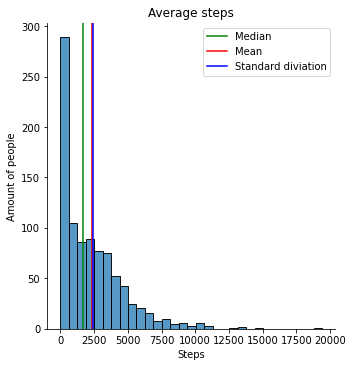

In [7]:
axe = sns.displot(data=combinedDf2, x="Average_steps")
axe.set(xlabel='Steps', ylabel='Amount of people', title='Average steps')
plt.axvline(median, 0, 100, color='green', label='Median')
plt.axvline(mean, 0, 100, color='red', label='Mean') 
plt.axvline(sd_div, 0, 100, color='blue', label='Standard diviation') 
plt.legend()

The graph shows a skewed result. Many participants set on average almost zero steps, one could suggest that those people did not track their steps on almost all the most days. Also a few set more than 12500 steps. These extreme values makes it harder to interpret the data, because the graph is zoomed out to fit those results. For that reason, we left those result out.

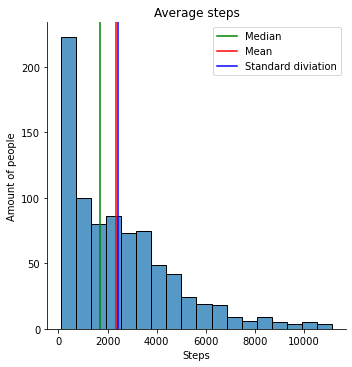

In [8]:
combinedDf2 = combinedDf2[(combinedDf2['Average_steps'] < 12500) & (combinedDf2['Average_steps'] > 100) ]
axe = sns.displot(data=combinedDf2, x="Average_steps")
axe.set(xlabel='Steps', ylabel='Amount of people', title='Average steps')
plt.axvline(median, 0, 100, color='green', label='Median')
plt.axvline(mean, 0, 100, color='red', label='Mean') 
plt.axvline(sd_div, 0, 100, color='blue', label='Standard diviation') 
plt.legend()

The histogram shows that most participants set on average less than 500 steps a day. The participants who between 1500 and 3750 steps is roughly even distributed. But after the 3750 steps, the amount of participants fall off towards zero. The mean of all participants is around the 2400 steps. The standard diviation is not far of the mean, so that means most data is around the mean.
Unfortunately, the big amount of people that did not track their steps everyday skewed the results. According to the median the middle value is almost 500 steps under the mean, which means right skewness.

Next, we will dig deeper into the data of the participants. Every participant put in their city of residence and gender. The next visualation will combine those with each other and shows the average amount of steps per city and how it is seperated between males and females.

[Text(0.5, 0, 'Average steps'),
 Text(0, 0.5, 'city'),
 Text(0.5, 1.0, 'Steps per city')]

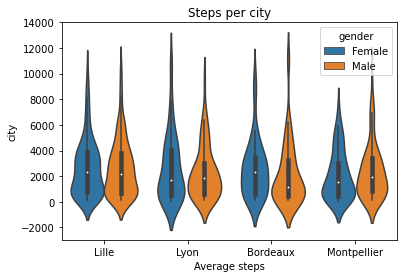

In [9]:
plot2 = sns.violinplot(data=combinedDf2, x="city", y="Average_steps", hue="gender")
plot2.set(xlabel='Average steps', ylabel='city', title='Steps per city')


Overal, people do not walk more than 2000 steps a day on average. Furthermore, in most cities the variance of steps for females is greater than males. For instance, In Bordeaux roughly the same amount of females set 2000 steps as 4000 steps. On the other hand in Montpellier more males walk between the 2000 and 4000 steps than females.

Next step is to get all the numerical values and put them in a pairplot. And also look for colleration between values.

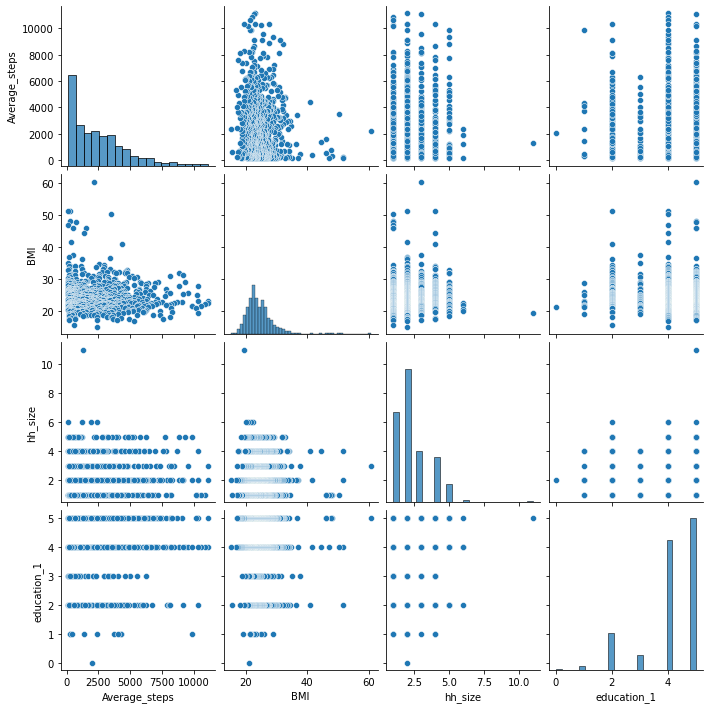

In [10]:
NumericalDF = combinedDf2[["Average_steps", "BMI", "hh_size", "education_1"]]
sns.pairplot(NumericalDF)
CorrDF = NumericalDF.corr()

<AxesSubplot:>

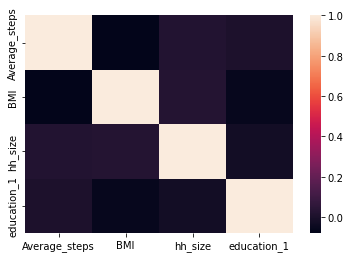

In [11]:
sns.heatmap(CorrDF)

Overal there is not much correlation between the values. However we can see other relation.
- Average steps and bmi: This is shaped like a cone. Participants who set more steps on a day are more healthy, but some healthy participants walk not that much.
- BMI and education: Participants with a lower education have a healtier bmi. Higher education levels have a higher variance in BMI. Remarkable point is a healthier BMI for the people with a Vocational degree. These participants do more physical active work. However they are not the group that step the most on a average.

To conclude, the explorative analysis do not give much insight in the correlation of the data, expect that healthier people walk slightly more.

<font size=5>Predictive Model</font>

The linear regression is a line that predict the dependent variable value (y) on a independent variable (x). The line is based on the average step height, so if you go 1 to the left on x axis that is 3 on the y axis. Therefore one could predict that y=9 on x=3.

Next we create dummies for the categorical variables so our predictive model can process all data.

In [12]:
df = pd.get_dummies(combinedDf2)
df

,id,hh_size,education,education_1,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,...,city_Lyon,city_Montpellier,gender_Female,gender_Male,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,age_<25
820,821,3,4,5,160.0,155.0,0.0,0.0,0.0,3410.0,...,0,0,1,0,1,0,0,0,0,0
323,324,4,4,4,165.0,140.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,1,0,0,0
390,391,2,2,2,165.0,140.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,1,0,0,0,0
890,891,1,1,4,167.0,140.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
52,53,1,1,5,158.0,120.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,1,1,5,162.0,45.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0
709,710,1,1,5,176.0,53.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
122,123,2,2,4,164.0,45.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0
727,728,1,1,2,185.0,53.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0


Now we are going to split the dataframe into test and training data. Then we use the training data to show the linear regression in a plot.

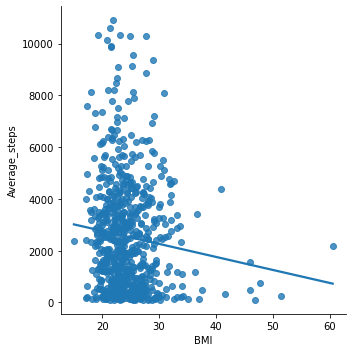

In [13]:
df_train, df_test = train_test_split(df, test_size=0.2)

sns.lmplot(x='BMI', y='Average_steps', data=df_train, ci=False)
plt.show()

As seen in the plot above, It show a linear regression downwards. This means that people with higher BMI set less steps on average on a day as expected.

<font size=5>Evaluation</font>

Next we will evaluate the model with the test data. We want to know the variance of the measured data to the predicted values. We can evaluate the accuracy of the model by calculation of the R2 and the RSME

In [14]:
x =df_test[['BMI', 'age_25-34','age_35-44', 'age_45-54', 'age_55-64', 'age_65+', 'age_<25', 'gender_Female', 'gender_Male', 'hh_size', 'education_1', 'city_Montpellier','city_Lyon', 'city_Lille', 'city_Bordeaux']]
y= df_test['Average_steps']

lm = LinearRegression()
lm.fit(x,y)

df_test['Predicted_steps'] = lm.predict(x)
df_test

,id,hh_size,education,education_1,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,...,city_Montpellier,gender_Female,gender_Male,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,age_<25,Predicted_steps
707,708,1,1,4,156.0,59.0,0.0,0.0,0.0,0.0,...,1,1,0,1,0,0,0,0,0,1653.905378
35,36,3,4,4,182.0,88.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,2420.990300
853,854,5,4,5,186.0,93.0,0.0,6529.0,8952.0,2992.0,...,0,0,1,1,0,0,0,0,0,2066.777432
314,315,3,3,4,173.0,78.0,0.0,20261.0,16788.0,8263.0,...,0,0,1,1,0,0,0,0,0,2431.329729
877,878,2,2,4,172.0,85.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,2250.618046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,757,3,3,5,187.0,76.0,0.0,0.0,12742.0,9065.0,...,0,0,1,0,1,0,0,0,0,3557.103622
579,580,1,1,5,168.0,74.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,1,943.654341
34,35,3,4,4,163.0,58.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,1938.970264
466,467,2,2,5,183.0,86.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,3087.112732


In [15]:
r2_score(df_test['Average_steps'], df_test['Predicted_steps'])

0.1306216606799323

In [16]:
math.sqrt(mean_squared_error(df_test['Average_steps'], df_test['Predicted_steps']))

2147.7537474621445

In [17]:
df_test['Residuals'] = df_test['Average_steps'] - df_test['Predicted_steps']
df_test['Residuals'].describe()

count    1.670000e+02
mean    -3.608025e-13
std      2.154213e+03
min     -3.946410e+03
25%     -1.460893e+03
50%     -6.318178e+02
75%      1.043492e+03
max      6.216727e+03
Name: Residuals, dtype: float64

The results shows that the model is not very accurate. The residuals varies from 4000 steps under the average till 8000 steps above the linear regressions, but mostly 1500 under and 1000 above the linear regression. The same varying result was also concluded in the exploratory data analysis. The model do show some colloration between the BMI and average steps. But still, the results between the participants varies too widely to make the prediction of the model accurate.

<font size=5>Conclusion</font>

This analysis looked into the average steps of the participants. The data was gathered over period of approximately a year. However many data of participants was missing, which results in varying mean of steps. The prediction shows a colleration between the BMI and average steps, but many results do not match the linear regression. The variance per participants is too wide to make an accurate prediction. That issue can be resolved with other data or leave out the participants who had a lot of unregistered days.